In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train = pd.read_csv("./data/FIFA_train.csv")
test = pd.read_csv("./data/FIFA_test.csv")

# print(train.head(5))

   id          name  age      continent contract_until position prefer_foot  \
0   0      L. Messi   31  south america           2021       ST        left   
1   3        De Gea   27         europe           2020       GK       right   
2   7     L. Suárez   31  south america           2021       ST       right   
3   8  Sergio Ramos   32         europe           2020       DF       right   
4   9      J. Oblak   25         europe           2021       GK       right   

   reputation  stat_overall  stat_potential  stat_skill_moves        value  
0         5.0            94              94               4.0  110500000.0  
1         4.0            91              93               1.0   72000000.0  
2         5.0            91              91               3.0   80000000.0  
3         4.0            91              91               3.0   51000000.0  
4         3.0            90              93               1.0   68000000.0  


In [52]:
train.info()
# null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [53]:
#contract_until 변수 int 형으로 변환
# 계약 연도만 추출
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:]
    return int(string)


train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [54]:
# 문자형 변수 label 인코딩 진행
train['continent'] = train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

<AxesSubplot:>

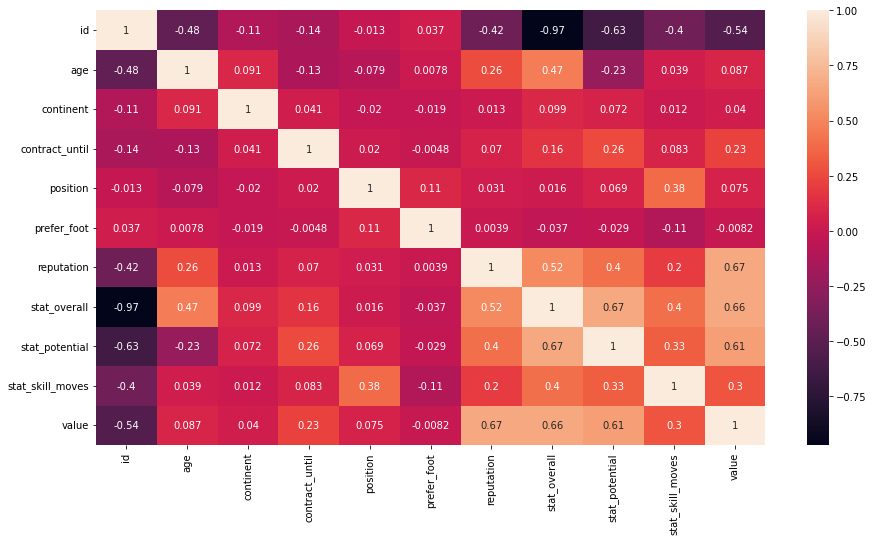

In [55]:
corr_df = train.corr() # 상관계수

# 상관계수 시각화
plt.figure(figsize = (15,8)) 
sns.heatmap(corr_df, annot=True)
# plt.savefig('corr.png') 

In [56]:
# 불필요한 컬럼 제거
train.drop(['id', 'name'], axis = 1, inplace = True)
test.drop(['id', 'name'], axis = 1, inplace = True)